# Customer Segmentation with K-means

### Problem Statement:

We have a fake dataset composed of people with their age, education years, years employed, income, debts and addresses. The goal is to segment the customers using K-means.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Define six functions to help us in the script below.
def format_spines(ax, right_border=True):
    """docstring for format_spines:
    this function sets up borders from an axis and personalize colors
    input:
        ax: figure axis
        right_border: flag to determine if the right border will be visible or not"""
    
    # Setting up colors
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_color('#FFFFFF')
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')

def count_plot(feature, df, colors='Blues_d', hue=False):
    """docstring for count_plot:
    this function plots data setting up frequency and percentage. This algo sets up borders
    and personalization
    input:
        feature: feature to be plotted
        df: dataframe
        colors = color palette (default=Blues_d)
        hue = second feature analysis (default=False)"""
    
    # Preparing variables
    ncount = len(df)
    fig, ax = plt.subplots()
    if hue != False:
        ax = sns.countplot(x=feature, data=df, palette=colors, hue=hue)
    else:
        ax = sns.countplot(x=feature, data=df, palette=colors)

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]')

    # Setting borders
    format_spines(ax)
    format_spines(ax2)

    # Setting percentage
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    if not hue:
        ax.set_title(df[feature].describe().name + ' Analysis', size=13, pad=15)
    else:
        ax.set_title(df[feature].describe().name + ' Analysis by ' + hue, size=13, pad=15)
        
    plt.show()
    
def compute_square_distances(df, Kmin=1, Kmax=12):
    """docstring for compute_square_distances
    this function computes the square distance of KMeans algorithm through the number of
    clusters in range Kmin and Kmax
    input:
        df: dataframe
        Kmin: min index of K analysis
        Kmax: max index of K analysis"""
    
    square_dist = []
    K = range(Kmin, Kmax)
    for k in K:
        km = KMeans(n_clusters=k)
        km.fit(df)
        square_dist.append(km.inertia_)
    return K, square_dist

def plot_elbow_method(df, Kmin=1, Kmax=12):
    """docstring for plot_elbow_method
    this function computes the square distances and plots the elbow method for best cluster
    number analysis
    input:
        df: dataframe
        Kmin: min index of K analysis
        Kmax: max index of K analysis"""
    
    # Computing distances
    K, square_dist = compute_square_distances(df, Kmin, Kmax)
    
    # Plotting elbow method
    fig, ax = plt.subplots()
    ax.plot(K, square_dist, 'bo-')
    format_spines(ax, right_border=False)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Sum of Square Dist')
    plt.title(f'Elbow Method - {df.columns[0]} and {df.columns[1]}', size=14)
    plt.show()
    
# Function to check the distribution for every numerical variable within a dataframe
def histograms_numeric_columns(df, numerical_columns):
    '''
    Takes df, numerical columns as list
    Returns a group of histagrams
    '''
    f = pd.melt(df, value_vars=numerical_columns) 
    g = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
    g = g.map(sns.distplot, 'value')
    return g

# Write a function that puts all important statistics for a dataframe
# Similar to the describe command except it shows vertically and for all data types
def stats(data): 
    df = {}
    df['null_sum'] = data.isnull().sum() # Sum missing values
    df['null_pct'] = data.isnull().mean() # Percentage missing values
    df['dtypes'] = data.dtypes # data type
    df['count'] = data.count() # number of row values
    df['mean'] = data.mean() # mean of values
    df['std'] = data.std() # standard deviation of values
    df['median'] = data.median() # median of values
    df['min'] = data.min() # min of values
    df['25%'] = data.quantile(0.25) # 1st quartile
    df['50%'] = data.quantile(0.5) # 2nd quartile
    df['75%'] = data.quantile(0.75) # 3rd quartile
    df['max'] = data.max() # max of values
    pd.set_option('display.float_format', lambda x: '%.2f' % x) # 2 decimals
    
    return pd.DataFrame(df)

In [3]:
# Load and show dataframe
df = pd.read_csv('cust_seg.csv')
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [4]:
# Drop "Address" as it's a categorical variable
df = df.drop('Address', axis = 1)

In [5]:
# Rename Columns
df.columns = ['Customer ID', 'Age', 'Education', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'Defaulted', 'Debt Income Ratio']
df.head()

,Customer ID,Age,Education,Years Employed,Income,Card Debt,Other Debt,Defaulted,Debt Income Ratio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [6]:
print(f'This dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

This dataset has 850 rows and 9 columns.


In [7]:
# Use function that puts all important statistics for a dataframe
stats(df)

,null_sum,null_pct,dtypes,count,mean,std,median,min,25%,50%,75%,max
Customer ID,0,0.00,int64,850,425.50,245.52,425.50,1.00,213.25,425.50,637.75,850.00
Age,0,0.00,int64,850,35.03,8.04,34.00,20.00,29.00,34.00,41.00,56.00
Education,0,0.00,int64,850,1.71,0.93,1.00,1.00,1.00,1.00,2.00,5.00
Years Employed,0,0.00,int64,850,8.57,6.78,7.00,0.00,3.00,7.00,13.00,33.00
Income,0,0.00,int64,850,46.68,38.54,35.00,13.00,24.00,35.00,55.75,446.00
Card Debt,0,0.00,float64,850,1.58,2.13,0.89,0.01,0.38,0.89,1.90,20.56
Other Debt,0,0.00,float64,850,3.08,3.40,2.00,0.05,1.05,2.00,3.90,35.20
Defaulted,150,0.18,float64,700,0.26,0.44,0.00,0.00,0.00,0.00,1.00,1.00
Debt Income Ratio,0,0.00,float64,850,10.17,6.72,8.70,0.10,5.10,8.70,13.80,41.30


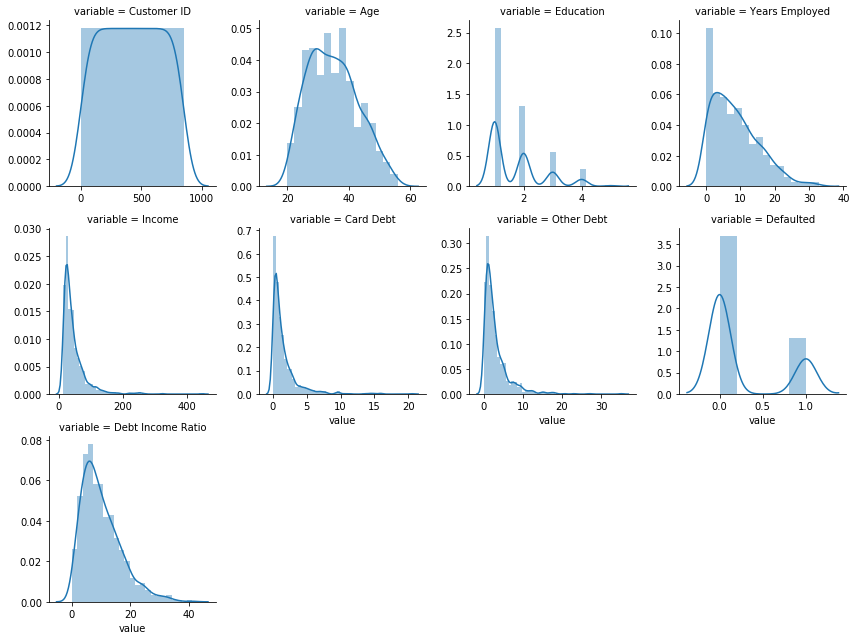

In [8]:
# Check the distribution for every numerical variable within a dataframe
df_num_columns = df.select_dtypes(include=['float64', 'int64']).columns
histograms_numeric_columns(df, df_num_columns)

In [9]:
# Creating a new category for Age Range
bins = [20, 27, 40, 56]
labels = ['Young', 'Adult', 'Senior']
df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df.head()

,Customer ID,Age,Education,Years Employed,Income,Card Debt,Other Debt,Defaulted,Debt Income Ratio,Age Range
0,1,41,2,6,19,0.12,1.07,0.00,6.30,Senior
1,2,47,1,26,100,4.58,8.22,0.00,12.80,Senior
2,3,33,2,10,57,6.11,5.80,1.00,20.90,Adult
3,4,29,2,4,19,0.68,0.52,0.00,6.30,Adult
4,5,47,1,31,253,9.31,8.91,0.00,7.20,Senior


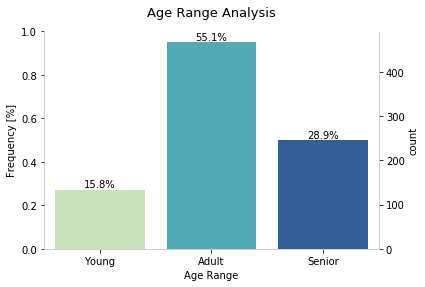

In [10]:
# Plot the Age Range
count_plot(feature='Age Range', df = df, colors='YlGnBu')

In [11]:
# Drop the Age Range from the dataframe:
df = df.drop(columns = ['Age Range'])

In [12]:
df.head()

,Customer ID,Age,Education,Years Employed,Income,Card Debt,Other Debt,Defaulted,Debt Income Ratio
0,1,41,2,6,19,0.12,1.07,0.00,6.30
1,2,47,1,26,100,4.58,8.22,0.00,12.80
2,3,33,2,10,57,6.11,5.80,1.00,20.90
3,4,29,2,4,19,0.68,0.52,0.00,6.30
4,5,47,1,31,253,9.31,8.91,0.00,7.20


In [21]:
# Normalize data with StandardScaler()
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Cluster_dataset = StandardScaler().fit_transform(X)
Cluster_dataset

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.52379654,
        -0.57652509,  0.43538045],
       [ 1.48949049, -0.76634938,  2.5737211 , ..., -0.52379654,
         0.39138677, -1.80748853],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  1.90913822,
         1.59755385,  0.43538045],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  1.90913822,
         3.45892281,  0.43538045],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.52379654,
        -1.08281745,  0.43538045],
       [ 2.1116364 , -0.76634938,  1.09746566, ..., -0.52379654,
        -0.2340332 , -1.80748853]])

In [22]:
# Rename columns
df_normalized = pd.DataFrame(Cluster_dataset)
df_normalized.rename(columns={0:'Customer Id', 1:'Age', 2:'Education', 3:'Years Employed', \
                              4:'Income', 5:'Card Debt', 6:'Other Debt', 7:'Defaulted', \
                              8:'DebtIncomeRatio'}, inplace=True)
df_normalized.head()

,Customer Id,Age,Education,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0.74,0.31,-0.38,-0.72,-0.68,-0.59,-0.52,-0.58,0.44
1,1.49,-0.77,2.57,1.38,1.41,1.51,-0.52,0.39,-1.81
2,-0.25,0.31,0.21,0.27,2.13,0.80,1.91,1.60,0.44
3,-0.75,0.31,-0.67,-0.72,-0.42,-0.75,-0.52,-0.58,0.44
4,1.49,-0.77,3.31,5.36,3.64,1.72,-0.52,-0.44,2.68


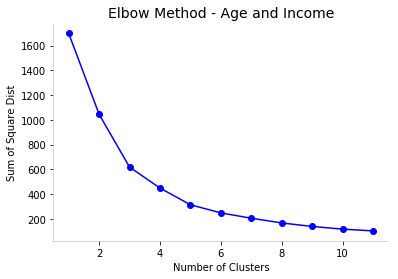

In [23]:
# Searching for optimal K with respect to Age and Income
df_1 = df_normalized.loc[:, ['Age', 'Income']]
plot_elbow_method(df_1)

In [24]:
# The optimal K is 3 based on the previous graph.
# Apply K-means on the dataset
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_

In [25]:
# Assign labels to each row in df
df["Cluster_k"] = labels
df.head(10)

,Customer ID,Age,Education,Years Employed,Income,Card Debt,Other Debt,Defaulted,Debt Income Ratio,Cluster_k
0,1,41,2,6,19,0.12,1.07,0.00,6.30,1
1,2,47,1,26,100,4.58,8.22,0.00,12.80,0
2,3,33,2,10,57,6.11,5.80,1.00,20.90,1
3,4,29,2,4,19,0.68,0.52,0.00,6.30,1
4,5,47,1,31,253,9.31,8.91,0.00,7.20,2
5,6,40,1,23,81,1.00,7.83,nan,10.90,0
6,7,38,2,4,56,0.44,0.45,0.00,1.60,1
7,8,42,3,0,64,0.28,3.94,0.00,6.60,0
8,9,26,1,5,18,0.57,2.21,nan,15.50,1
9,10,47,3,23,115,0.65,3.95,0.00,4.00,0


In [26]:
# Check the centroid values by averaging the features in each cluster
df.groupby('Cluster_k').mean()

,Customer ID,Age,Education,Years Employed,Income,Card Debt,Other Debt,Defaulted,Debt Income Ratio
Cluster_k,,,,,,,,,
0,402.30,41.33,1.96,15.26,83.93,3.10,5.77,0.17,10.72
1,432.47,32.96,1.61,6.37,31.16,1.03,2.10,0.29,10.09
2,410.17,45.39,2.67,19.56,227.17,5.68,10.91,0.29,7.32


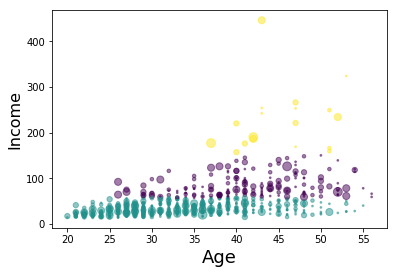

In [27]:
# Check distribution of customers based on their age and income
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

We can notice three distinct clusters grouped by Age and Income in the graph above and by Age, Income and Education below.

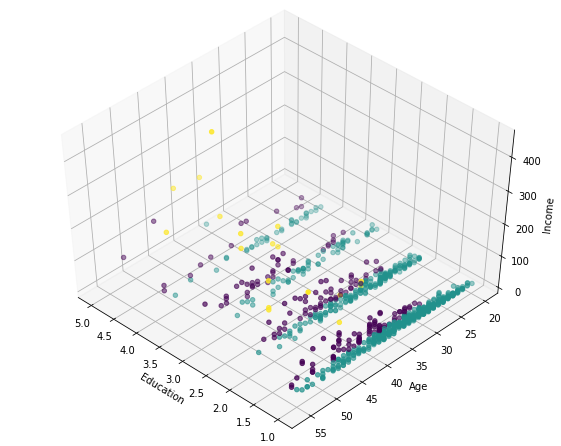

In [28]:
# Plot 3D scatter plot with 3 features (Education, Age, Income)

from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))